In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import seaborn as sns
sns.set_theme(style="darkgrid")


import spacy
from spacymoji import Emoji

import csv
import re
import pandas as pd
import emoji
import regex
from collections import Counter

from tqdm import tqdm


import os
import codecs
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display



import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

nltk.download('stopwords')


import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import plotly
pio.renderers.default = "notebook"




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rabie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#EXPLORATORY ARABIC OFFENSIVE LANGUAGE DATASET ANALYSIS
#http://alt.qcri.org/~hmubarak/offensive/AJCommentsClassification-CF.xlsx


# import he data

In [3]:
dataset = pd.read_excel("http://alt.qcri.org/~hmubarak/offensive/AJCommentsClassification-CF.xlsx")
dataset.shape

(31692, 15)

In [4]:
#_trusted_judgments
dataset['languagecomment'] = dataset['languagecomment'].astype('category')


dataset['languagecomment']=dataset['languagecomment'].cat.rename_categories({0: 'offensive', -1: 'Clean',-2:'obscene'})


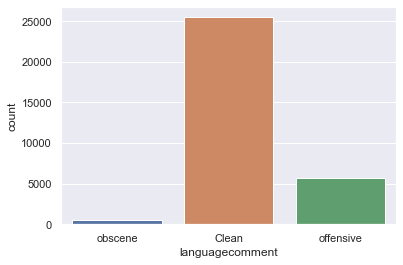

In [5]:
#Class distribution for the L_HSAB
ax=sns.countplot(x='languagecomment', data=dataset)

sns.set_theme(style='white')



In [6]:

#count the number of dublicates
print(dataset['body'].duplicated().sum())


9


In [7]:
'''
copy_origin_ds['body']=copy_origin_ds['body'].str.replace('@USER','')
copy_origin_ds['body']=copy_origin_ds['body'].str.replace('<LF>','')
copy_origin_ds['body']=copy_origin_ds['body'].str.replace('URL','')
copy_origin_ds['body']=copy_origin_ds['body'].str.replace('RT','')
copy_origin_ds['body']=copy_origin_ds['body'].str.replace('NOT_VLG','')
copy_origin_ds['body']=copy_origin_ds['body'].str.replace('NOT_HS','')
copy_origin_ds['body']=copy_origin_ds['body'].str.replace('NOT_OFF','')
copy_origin_ds['body']=copy_origin_ds['body'].str.replace('NOT_VIO','')
copy_origin_ds['body']=copy_origin_ds['body'].str.replace('NOTVIO','')

original_ds_train["Tweet"] = copy_origin_ds['body'].str.replace('[^\w\s]','')


copy_origin_ds['body']=copy_origin_ds['body'].str.replace('OFF','')


copy_origin_ds['body']=copy_origin_ds['body'].str.replace('_','')





original_ds_train
'''

'\noriginal_ds_train[\'Tweet\']=original_ds_train[\'Tweet\'].str.replace(\'@USER\',\'\')\noriginal_ds_train[\'Tweet\']=original_ds_train[\'Tweet\'].str.replace(\'<LF>\',\'\')\noriginal_ds_train[\'Tweet\']=original_ds_train[\'Tweet\'].str.replace(\'URL\',\'\')\noriginal_ds_train[\'Tweet\']=original_ds_train[\'Tweet\'].str.replace(\'RT\',\'\')\noriginal_ds_train[\'Tweet\']=original_ds_train[\'Tweet\'].str.replace(\'NOT_VLG\',\'\')\noriginal_ds_train[\'Tweet\']=original_ds_train[\'Tweet\'].str.replace(\'NOT_HS\',\'\')\noriginal_ds_train[\'Tweet\']=original_ds_train[\'Tweet\'].str.replace(\'NOT_OFF\',\'\')\noriginal_ds_train[\'Tweet\']=original_ds_train[\'Tweet\'].str.replace(\'NOT_VIO\',\'\')\noriginal_ds_train[\'Tweet\']=original_ds_train[\'Tweet\'].str.replace(\'NOTVIO\',\'\')\n\noriginal_ds_train["Tweet"] = original_ds_train[\'Tweet\'].str.replace(\'[^\\w\\s]\',\'\')\n\n\noriginal_ds_train[\'Tweet\']=original_ds_train[\'Tweet\'].str.replace(\'OFF\',\'\')\n\n\noriginal_ds_train[\'Tweet\

# wordcloud

In [8]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            u"\U0001f926-\U0001f937"
                            u'\U00010000-\U0010ffff'
                            u"\u200d"
                            u"\u2640-\u2642"
                            u"\u2600-\u2B55"
                            u"\u23cf"
                            u"\u23e9"
                            u"\u231a"
                            u"\u3030"
                            u"\ufe0f"
                            u"\u2069"
                            u"\u2066"
                            u"\u200c"
                            u"\u2068"
                            u"\u2067"
    "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

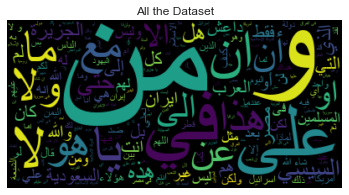

In [9]:
tweet_text=' '.join(dataset['body'])



tweet_text = arabic_reshaper.reshape(tweet_text)
tweet_text = get_display(tweet_text)
wordcloud = WordCloud(font_path='arial').generate(tweet_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('All the Dataset')
plt.show()


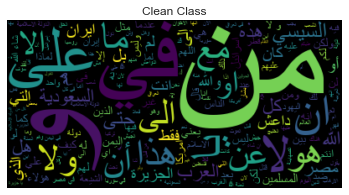

In [10]:
tweet_text=' '.join(dataset[dataset.languagecomment=='Clean']['body'])


tweet_text = arabic_reshaper.reshape(tweet_text)
tweet_text = get_display(tweet_text)
wordcloud = WordCloud(font_path='arial').generate(tweet_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Clean Class')
plt.show()

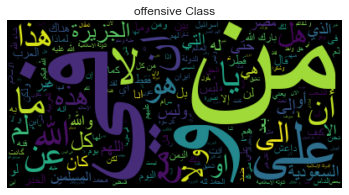

In [11]:
tweet_text=' '.join(dataset[dataset.languagecomment=='offensive']['body'])


tweet_text = arabic_reshaper.reshape(tweet_text)
tweet_text = get_display(tweet_text)
wordcloud = WordCloud(font_path='arial').generate(tweet_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('offensive Class')
plt.show()

# most frequents words

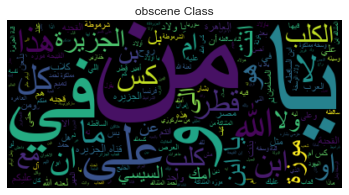

In [12]:
tweet_text=' '.join(dataset[dataset.languagecomment=='obscene']['body'])


tweet_text = arabic_reshaper.reshape(tweet_text)
tweet_text = get_display(tweet_text)
wordcloud = WordCloud(font_path='arial').generate(tweet_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('obscene Class')
plt.show()

In [ ]:
copy_origin_ds=dataset
copy_origin_ds['body'] = copy_origin_ds['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words('arabic'))]))
copy_origin_ds

In [14]:
word_df=pd.DataFrame(' '.join(dataset['body']).lower().split(),columns=['words'])
word_df

,words
0,يبغي
1,التنبيه
2,ان
3,السعودية
4,تستخدم
...,...
439743,للتخلص
439744,الراسمالیه
439745,المتوحشه
439746,ارهاب


In [16]:
copy_origin_ds['body']=copy_origin_ds['body'].str.replace('@USER','')
copy_origin_ds['body']=copy_origin_ds['body'].str.replace('<LF>','')
copy_origin_ds['body']=copy_origin_ds['body'].str.replace('URL','')
copy_origin_ds['body']=copy_origin_ds['body'].str.replace('RT','')
copy_origin_ds['body']=copy_origin_ds['body'].str.replace('NOT_VLG','')
copy_origin_ds['body']=copy_origin_ds['body'].str.replace('NOT_HS','')
copy_origin_ds['body']=copy_origin_ds['body'].str.replace('NOT_OFF','')
copy_origin_ds['body']=copy_origin_ds['body'].str.replace('NOT_VIO','')
copy_origin_ds['body']=copy_origin_ds['body'].str.replace('NOTVIO','')

copy_origin_ds["Tweet"] = copy_origin_ds['body'].str.replace('[^\w\s]','')


copy_origin_ds['body']=copy_origin_ds['body'].str.replace('OFF','')


copy_origin_ds['body']=copy_origin_ds['body'].str.replace('_','')







C:\Users\rabie\AppData\Local\Temp\ipykernel_13476\1495928525.py:11: FutureWarning:

The default value of regex will change from True to False in a future version.



<BarContainer object of 10 artists>

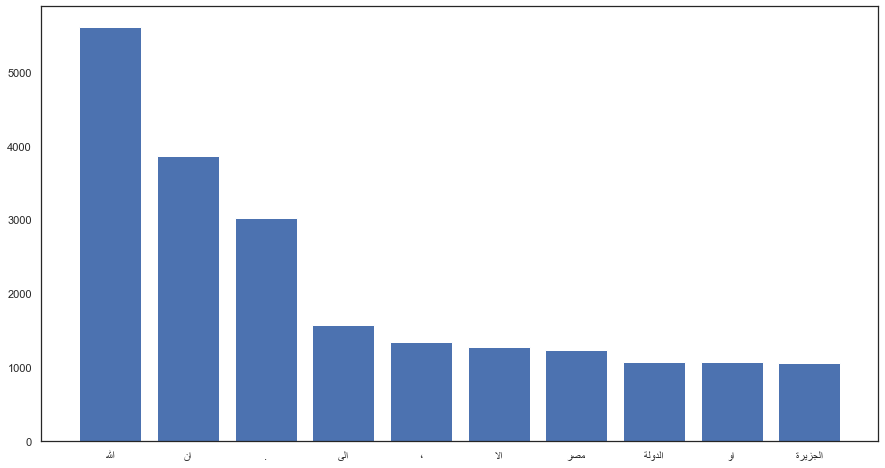

In [17]:
top_all=pd.Series(' '.join(dataset['body']).lower().split()).value_counts()[:10].to_dict()
for old_key in list(top_all):
    new_key=arabic_reshaper.reshape(old_key)
    new_key = get_display(new_key)
    top_all[new_key] = top_all.pop(old_key)

plt.figure(figsize=(15,8))
plt.bar(top_all.keys(), top_all.values())



In [19]:
from turtle import width


def GetTopWord(k,hclass):
    word_df=pd.DataFrame(' '.join(dataset['body']).lower().split(),columns=['words'])
    top_all=pd.Series(' '.join(copy_origin_ds[copy_origin_ds['languagecomment']==hclass]['body']).lower().split()).value_counts()[:k].to_dict()
    for old_key in list(top_all):
        new_key=arabic_reshaper.reshape(old_key)
        new_key = get_display(new_key)
        top_all[new_key] = top_all.pop(old_key)

    my_df = pd.DataFrame(top_all.items())
    plt.figure(figsize=(15,8))
    ax = sns.barplot(x=0, y=1, data=my_df,color='blue')
    ax.set(xlabel = 'tokens', ylabel='%', title=f'Most common {hclass} tokens in the L-HSAB ')
    #plt.bar(top_all.keys(), top_all.values())
    #plt.title(f'top {k} words in the {hclass} class')

    

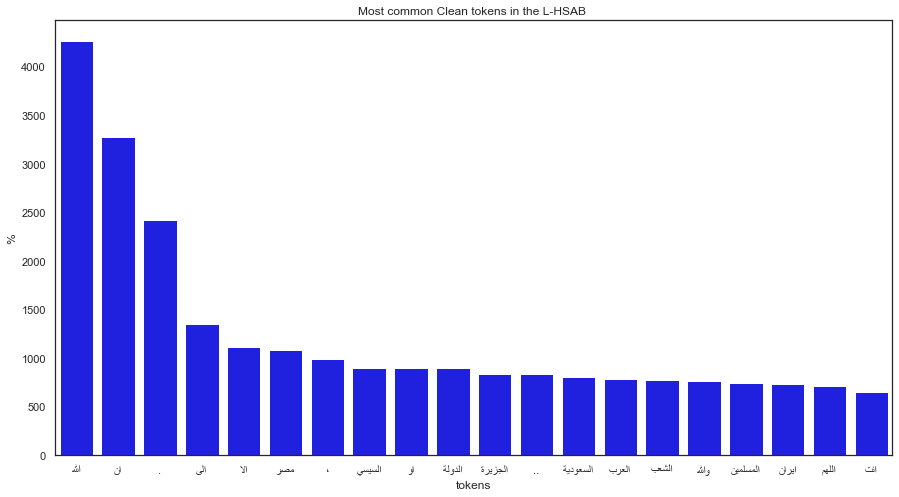

In [22]:
GetTopWord(20,'Clean')


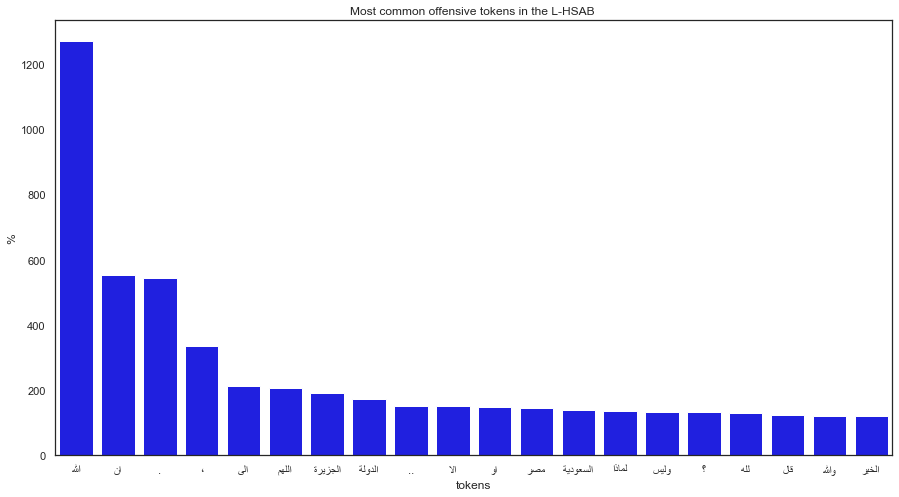

In [23]:
GetTopWord(20,'offensive')


# number  of  tokens  per  tweet 

<AxesSubplot:xlabel='languagecomment', ylabel='number_of_tokens'>

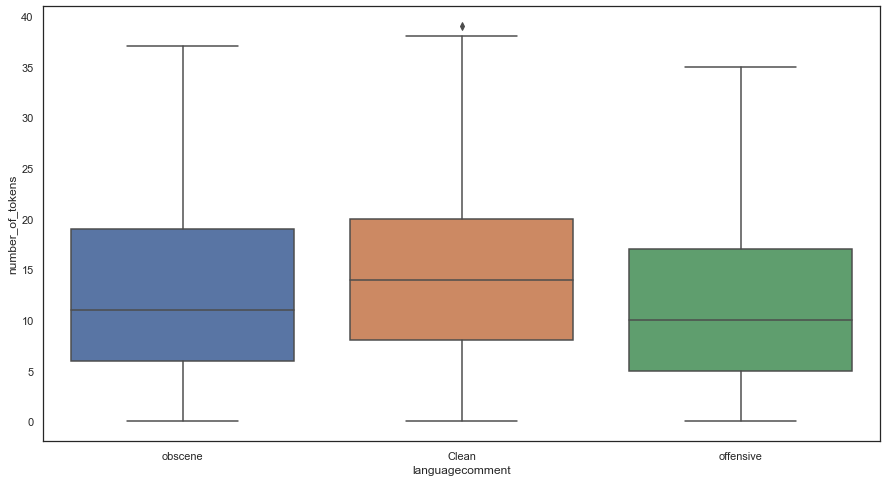

In [25]:
NOTPT_df=copy_origin_ds
NOTPT_df['number_of_tokens'] = NOTPT_df['body'].str.split().str.len()
plt.figure(figsize=(15,8))

sns.boxplot(data=NOTPT_df, x='languagecomment', y='number_of_tokens',showfliers = True)